In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

In [4]:
from google.colab import files

files = files.upload()

Saving dataset-of-10s.csv to dataset-of-10s.csv


In [5]:
import io

In [6]:
data = pd.read_csv(io.BytesIO(files['dataset-of-10s.csv']))

In [7]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [8]:
data.shape

(6398, 19)

In [9]:
model = LogisticRegression(solver='lbfgs',max_iter=1000)

In [10]:
from sklearn.model_selection import train_test_split
X_data = data.drop(['track','artist','uri','target'], axis=1)

In [11]:
normalized=(X_data-X_data.min())/(X_data.max()-X_data.min())

In [12]:
X_train, X_test, y_train, y_test = train_test_split(normalized, data['target'], test_size=0.2, random_state=0)

In [13]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
prediction = model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction))

0.8109375


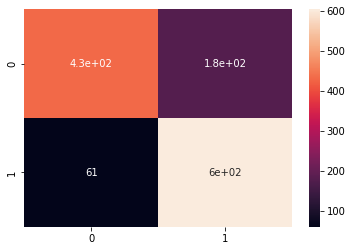

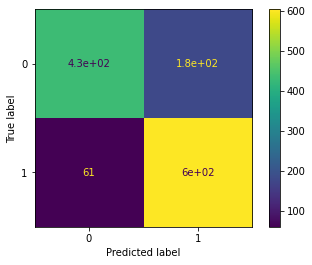

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [17]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [18]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation
import matplotlib.pyplot as plt

Epoch 1/50
160/160 [==============================] - 1s 5ms/step - loss: 0.6754 - accuracy: 0.6077 - val_loss: 0.6592 - val_accuracy: 0.6891
Epoch 2/50
160/160 [==============================] - 1s 4ms/step - loss: 0.6442 - accuracy: 0.6940 - val_loss: 0.6221 - val_accuracy: 0.7273
Epoch 3/50
160/160 [==============================] - 1s 4ms/step - loss: 0.6056 - accuracy: 0.7118 - val_loss: 0.5789 - val_accuracy: 0.7344
Epoch 4/50
160/160 [==============================] - 1s 4ms/step - loss: 0.5682 - accuracy: 0.7198 - val_loss: 0.5422 - val_accuracy: 0.7336
Epoch 5/50
160/160 [==============================] - 1s 4ms/step - loss: 0.5413 - accuracy: 0.7249 - val_loss: 0.5167 - val_accuracy: 0.7437
Epoch 6/50
160/160 [==============================] - 1s 4ms/step - loss: 0.5226 - accuracy: 0.7323 - val_loss: 0.5006 - val_accuracy: 0.7609
Epoch 7/50
160/160 [==============================] - 1s 4ms/step - loss: 0.5097 - accuracy: 0.7429 - val_loss: 0.4857 - val_accuracy: 0.7656
Epoch 

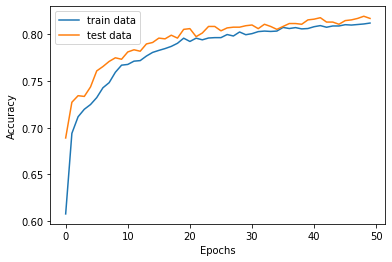

In [20]:
ann = Sequential()
ann.add(Flatten())

ann.add(Dense(32))
ann.add(Activation('relu'))
ann.add(Dense(64))
ann.add(Activation('relu'))
ann.add(Dense(128))
ann.add(Activation('relu'))

ann.add(Dense(2))
ann.add(Activation('softmax'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

ann.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = ann.fit(X_train, y_train, \
                    validation_data=(X_test, y_test), \
                    epochs=50)
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train data', 'test data'])
plt.show()

In [21]:
probability_model = tf.keras.Sequential([ann, tf.keras.layers.Softmax()])

In [22]:
predictions = probability_model.predict(X_test)

In [24]:
predictions[0]

array([0.35549462, 0.64450544], dtype=float32)

In [29]:
import numpy as np
np.argmax(predictions[0])

1

In [30]:
# Since output is binary (0 for flop, 1 for hit), the model says the song will be a hit. 